In [4]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data = loadtxt('pima-indians-diabetes.csv', delimiter=',')
print(data.shape)

(768, 9)


In [6]:
X = data[:,0:8]
y = data[:,-1]
print(X.shape)
print(data[0])
print(y.shape)

(768, 8)
[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
(768,)


In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)
X_train = (X_train-mean_train)/std_train
X_test = (X_test-mean_train)/std_train

In [11]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_split=0.25)

Epoch 1/120
15/15 [==============================] - 1s 23ms/step - loss: 0.6840 - accuracy: 0.5832 - val_loss: 0.6723 - val_accuracy: 0.5909
Epoch 2/120
15/15 [==============================] - 0s 7ms/step - loss: 0.6618 - accuracy: 0.6329 - val_loss: 0.6503 - val_accuracy: 0.6753
Epoch 3/120
15/15 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6837 - val_loss: 0.6321 - val_accuracy: 0.6948
Epoch 4/120
15/15 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.7175 - val_loss: 0.6157 - val_accuracy: 0.7208
Epoch 5/120
15/15 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.7013 - val_loss: 0.6019 - val_accuracy: 0.7273
Epoch 6/120
15/15 [==============================] - 0s 4ms/step - loss: 0.6130 - accuracy: 0.7123 - val_loss: 0.5892 - val_accuracy: 0.7338
Epoch 7/120
15/15 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.7180 - val_loss: 0.5768 - val_accuracy: 0.7273
Epoch 8/120


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

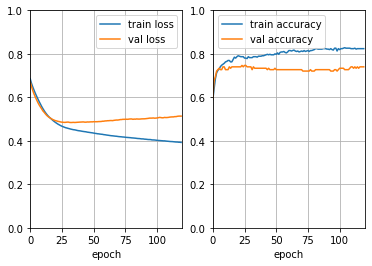

In [17]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7727
0.7727272510528564


In [24]:
y_pred = (model.predict(X_test)>0.5).astype('int32')


In [25]:
for i in range(10):
    print('predict:', y_pred[i], 'expected:', y_test[i])

predict: [1] expected: 1.0
predict: [0] expected: 0.0
predict: [0] expected: 0.0
predict: [1] expected: 1.0
predict: [0] expected: 0.0
predict: [0] expected: 0.0
predict: [1] expected: 1.0
predict: [1] expected: 1.0
predict: [1] expected: 0.0
predict: [1] expected: 0.0
